This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Reading HDF5 files with a generic reader

This reader utilizes [h5py](https://docs.h5py.org).

In this example, we read HDF5 files from different sources using a generic reader from $\omega radlib's$ io module.

In [1]:
import wradlib as wrl
import wradlib_data
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()
import numpy as np

## Generic Reader

This is a generic hdf5 reader, which will read any hdf5 structure.

In [2]:
fpath = "hdf5/2014-08-10--182000.ppi.mvol"
f = wradlib_data.DATASETS.fetch(fpath)
fcontent = wrl.io.read_generic_hdf5(f)

In [3]:
print(fcontent.keys())

dict_keys(['how', 'scan0/how', 'scan0/how/extended', 'scan0/moment_0', 'scan0/moment_1', 'scan0/moment_10', 'scan0/moment_11', 'scan0/moment_2', 'scan0/moment_3', 'scan0/moment_4', 'scan0/moment_5', 'scan0/moment_6', 'scan0/moment_7', 'scan0/moment_8', 'scan0/moment_9', 'scan0/ray_header', 'scan0/what', 'what', 'where'])


In [4]:
print(fcontent["where"])
print(fcontent["how"])
print(fcontent["scan0/moment_3"].keys())
print(fcontent["scan0/moment_3"]["attrs"])
print(fcontent["scan0/moment_3"]["data"].shape)

{'attrs': {'height': np.float64(99.5), 'lat': np.float64(50.73052), 'lon': np.float64(7.071663)}}
{'attrs': {'azimuth_beam': np.float64(1.0), 'elevation_beam': np.float64(1.0), 'host_name': 'radar.meteo.uni-bonn.de', 'sdp_name': 'ENIGMA III DUALPOL', 'site_name': '12345', 'software': 'MURAN', 'template_name': 'ppi_1p5deg'}}
dict_keys(['attrs', 'data'])
{'dyn_range_max': np.float32(95.5), 'dyn_range_min': np.float32(-32.0), 'format': 'UV8', 'moment': 'UH'}
(360, 1000)


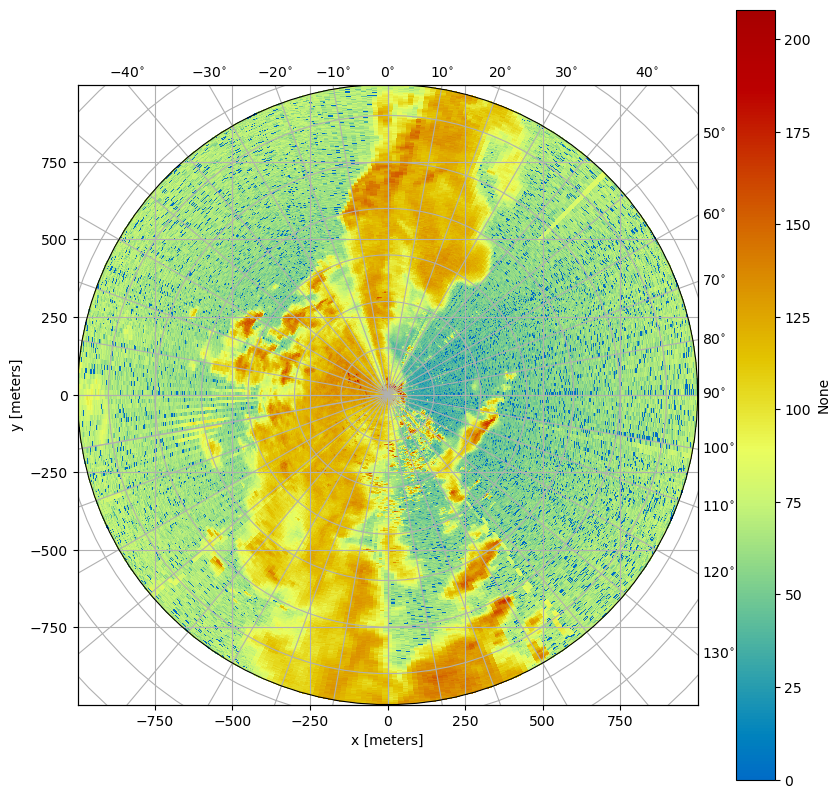

In [5]:
fig = plt.figure(figsize=(10, 10))
da = wrl.georef.create_xarray_dataarray(
    fcontent["scan0/moment_3"]["data"]
).wrl.georef.georeference()
im = da.wrl.vis.plot(fig=fig, crs="cg")